In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 0
setup_one_gpu(GPU)

Picking GPU 0


In [3]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from general_tools.notebook.tf import reset_tf_graph
from general_tools.in_out.basics import create_dir, files_in_subdirs

from geo_tool import Point_Cloud

from tf_lab.in_out.basics import Data_Splitter, read_saved_epochs
from tf_lab.point_clouds.ae_templates import mlp_architecture_ala_iclr_18, default_train_params

from tf_lab.point_clouds.autoencoder import Configuration as Conf
from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder

from tf_lab.point_clouds.in_out import load_point_clouds_from_filenames, PointCloudDataSet
from tf_lab.data_sets.shape_net import pc_loader as snc_loader
from tf_lab.data_sets.shape_net import snc_category_to_synth_id

from tf_lab.point_clouds.latent_gan import LatentGAN
from tf_lab.point_clouds.generators_discriminators import latent_code_discriminator_two_layers, \
latent_code_generator_two_layers, latent_code_discriminator, latent_code_generator

from tf_lab.iclr.helper import load_multiple_version_of_pcs, find_best_validation_epoch_from_train_stats
from tf_lab.point_clouds.convenience import get_latent_codes
from tf_lab.neural_net import MODEL_SAVER_ID

from tf_lab.point_clouds.raw_gan_gp import RawGAN_GP
from tf_lab.point_clouds.generators_discriminators import latent_code_generator

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator, point_cloud_generator

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [25]:
n_pc_points = 2048
class_name = 'chair'
syn_id = snc_category_to_synth_id()[class_name]
experiment_name = 'rebuttal'

In [5]:
top_data_dir = '/orions4-zfs/projects/optas/DATA/'
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)
train_data = in_data['train']

679 pclouds were loaded. They belong in 1 shape-classes.
5761 pclouds were loaded. They belong in 1 shape-classes.
338 pclouds were loaded. They belong in 1 shape-classes.


In [26]:
train_dir = '/orions4-zfs/projects/optas/DATA/OUT/icml/rebuttal'
create_dir(train_dir)
synthetic_data_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/synthetic_samples/r_gan_gp/'+ class_name
create_dir(synthetic_data_out_dir)
save_syn_data_dir = create_dir(osp.join(synthetic_data_out_dir, experiment_name))

In [27]:
init_lr = 0.0001
batch_size = 50
noise_params = {'mu':0, 'sigma': 0.2}
noise_dim = 128
n_syn_samples = train_data.num_examples
n_output = [n_pc_points, 3]
accum_syn_data = []
train_stats = []

In [28]:
# disc_kwargs = {'non_linearity': leaky_relu(leak), 'b_norm': False}
disc_kwargs = {'b_norm': False}

In [29]:
reset_tf_graph()
lam = 10
beta = 0.5
reset_tf_graph()

gan = RawGAN_GP(experiment_tag, init_lr, lam, n_output, noise_dim, \
                mlp_discriminator, point_cloud_generator,\
                disc_kwargs=disc_kwargs,\
                beta=beta                    
               )

In [33]:
max_epochs = 2000
save_synthetic_samples = np.hstack([np.array([1, 5, 10]), np.arange(100, 2001, 100)])
train_stats = []

1 (-0.4744503889394843, -0.30564141014347906) 21.9172930717


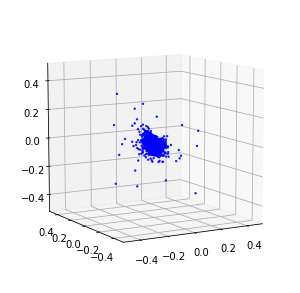

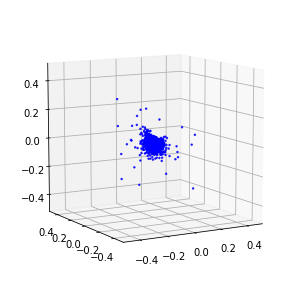

2 (-0.199035679516585, 0.22369264236286932) 21.926322937
3 (-0.2533667710812195, 0.0518572841487501) 22.0929269791
4 (-0.2781862735748291, 0.11737595200943558) 22.2551851273
5 (-0.2864065311525179, 0.16732878116485866) 22.3023679256


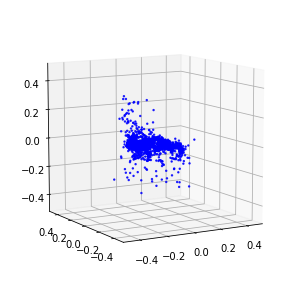

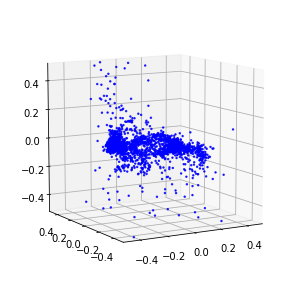

6 (-0.2848475816457168, 0.21220869635758194) 22.3206999302
7 (-0.2965026233507239, 0.22732870090428903) 22.4586539268
8 (-0.2698483293471129, 0.3345703320658725) 22.6632378101
9 (-0.2176867382681888, 0.38106291439465206) 22.6895928383
10 (-0.16980119736298271, 0.3384825514892683) 22.7607080936


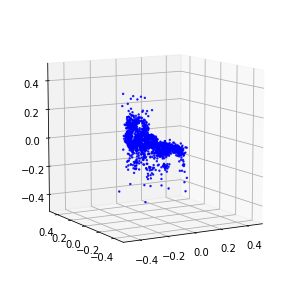

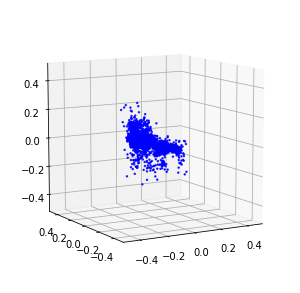

11 (-0.16346234731052234, 0.3238568936434129) 22.4428560734
12 (-0.18480444855016212, 0.40873695942370786) 22.7508401871
13 (-0.20225738416547362, 0.3973722953511321) 22.8548178673
14 (-0.22783202995424684, 0.44100969446742017) 22.8688488007
15 (-0.2323597849711128, 0.4944537852121436) 22.8055360317
16 (-0.22688313929930978, 0.46741383360779803) 22.8485910892
17 (-0.21538606532241988, 0.47481645060622174) 22.8155128956
18 (-0.2039991312700769, 0.5282778351203256) 22.8419718742
19 (-0.19081397276857626, 0.5326511445252792) 22.9299240112
20 (-0.17845366040001745, 0.5037632558656775) 22.8500919342
21 (-0.17141056203323862, 0.49106042540591693) 22.8436691761
22 (-0.1642734583305276, 0.45755460469619086) 22.7908689976
23 (-0.1659252247084742, 0.4657697509164396) 22.8263449669
24 (-0.15697728965593422, 0.40500453762386157) 22.8596498966
25 (-0.15137764617152835, 0.38004104598708777) 22.7962219715
26 (-0.14637655732424362, 0.35395705699920654) 22.8849170208
27 (-0.14423298563646234, 0.3559502

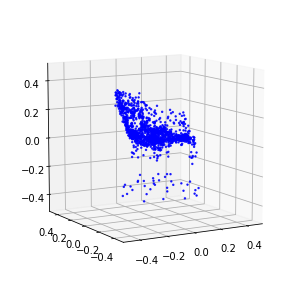

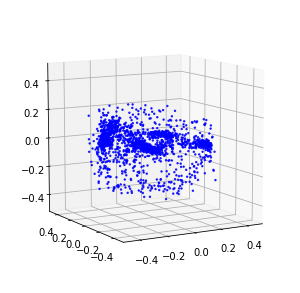

101 (-0.08182793842709583, 0.32650864318661066) 22.9739489555
102 (-0.08426410678936087, 0.3663493200488713) 23.0098218918
103 (-0.08192105626930361, 0.3461465135864589) 23.0510928631
104 (-0.0826262811117846, 0.33158470495887427) 23.2216711044
105 (-0.08221024887069411, 0.365945305513299) 23.0206000805
106 (-0.08157739516185677, 0.3634701565555904) 23.0844199657
107 (-0.0834030006242835, 0.330900314061538) 23.0493249893
108 (-0.08336005913822547, 0.33561352154482965) 23.0063261986
109 (-0.08169475664263186, 0.3449219478213269) 23.0376441479
110 (-0.08143821266358313, 0.3196511799874513) 23.1014139652
111 (-0.08099132092750591, 0.3208792481733405) 23.0322229862
112 (-0.08127096888163815, 0.30498343576555664) 23.1420888901
113 (-0.08185206781262937, 0.29478686918383057) 23.0656588078
114 (-0.0810195004162581, 0.31054470785286115) 23.2130968571
115 (-0.07949216122860493, 0.33237419892912323) 23.0812518597
116 (-0.08097340211920116, 0.3389633025812066) 23.163631916
117 (-0.078224349410637

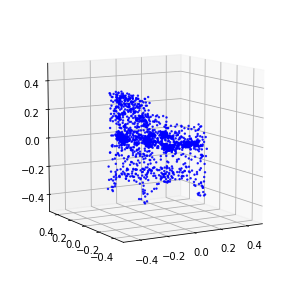

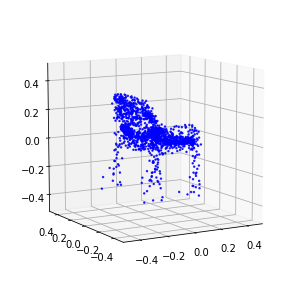

201 (-0.05874091126024723, 0.07404902334446492) 22.8042469025
202 (-0.05939812352475913, 0.07579848558500248) 23.1449820995
203 (-0.057618699141818545, 0.04407869785032033) 23.3249008656
204 (-0.059357678128973294, 0.027038537775692734) 23.2414209843
205 (-0.06019508435350397, 0.0496734198709221) 23.0928828716
206 (-0.06094940239968507, 0.031109243428901485) 23.1551580429
207 (-0.05995320585434851, 0.0569102617142641) 23.24736619
208 (-0.05923996191957723, 0.06920770814885265) 23.1706531048
209 (-0.058842725274355516, 0.054505752763994365) 23.282088995
210 (-0.05759992351674515, 0.05523112165215223) 23.1099209785
211 (-0.05792761966586113, 0.056597775233018656) 23.1760058403
212 (-0.05834166415683601, 0.07408853774161442) 23.1124498844
213 (-0.059150075734309526, 0.10168906706182854) 23.1841919422
214 (-0.05920170863037524, 0.06405577820766231) 23.1802690029
215 (-0.056585909669166025, 0.054879626117484724) 23.0562679768
216 (-0.0596611515659353, 0.05952472794477059) 23.2603478432
217 

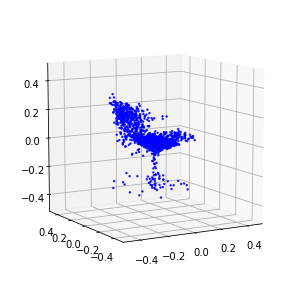

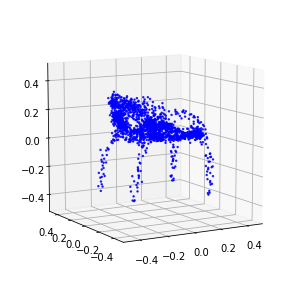

301 (-0.04900575484270635, 0.02932722715701422) 22.9391248226
302 (-0.05091027679002803, 0.0277685411679356) 23.1517550945
303 (-0.051141848528514736, 0.017441891872769465) 23.2670202255
304 (-0.04981743437440499, 0.06256342197403959) 23.2887260914
305 (-0.04908880920189878, 0.04535795871735267) 23.1265370846
306 (-0.050043979076587634, 0.05198510926034625) 23.2719371319
307 (-0.04997421767076721, 0.06523965219157221) 23.2123570442
308 (-0.05254573779909507, 0.019138416518335758) 23.2561640739
309 (-0.049184458087319916, 0.04856168936290171) 23.3412809372
310 (-0.049152320234671885, 0.048143405669733234) 23.1322910786
311 (-0.049604348401012625, 0.059160517083238) 23.1422419548
312 (-0.04966253452003002, 0.054171948693692684) 23.1820440292
313 (-0.048233660245719165, 0.026089316902115293) 23.2173290253
314 (-0.049553060207677926, 0.033246556823344334) 23.2518780231
315 (-0.05017002437101758, 0.036562431239239544) 23.3045859337
316 (-0.050292737814395326, 0.004147210441853689) 23.273458

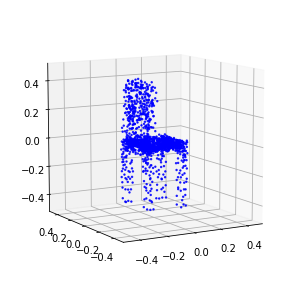

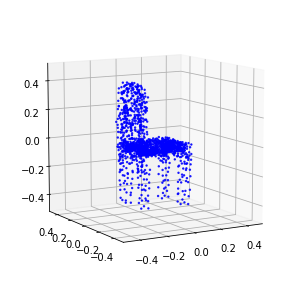

401 (-0.045824744374207825, -0.0024034214894408765) 22.6347899437
402 (-0.04486366602713647, -0.008842151358966594) 22.983905077
403 (-0.04411968470591566, -0.048737749943266746) 22.918462038
404 (-0.04488291996328727, -0.021090286404258855) 23.0239970684
405 (-0.04501533331754415, -0.03198467381298542) 22.9373230934
406 (-0.045873482241902665, -0.008694153137343086) 22.8808429241
407 (-0.04465598817104879, 0.005000058596994242) 22.923251152
408 (-0.04371323917546998, -0.042099953912522484) 22.9440770149
409 (-0.04460277220477229, -0.021969718311953802) 22.957901001
410 (-0.04661945745996807, -0.03719304877576297) 22.8860211372
411 (-0.042771519931114235, -0.013425697681352334) 22.9008648396
412 (-0.043969941965263826, -0.031492382834624986) 22.8861780167
413 (-0.0436956645677919, 0.00559089000782241) 22.8747289181
414 (-0.044402135463188525, -0.009579863480251768) 22.9215569496
415 (-0.04567032864560252, 0.002062997558032689) 22.9246869087
416 (-0.04310060797016258, -0.032517946183519

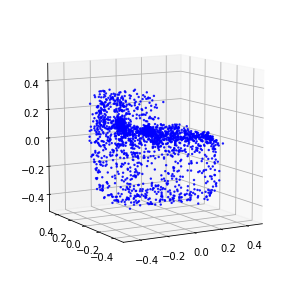

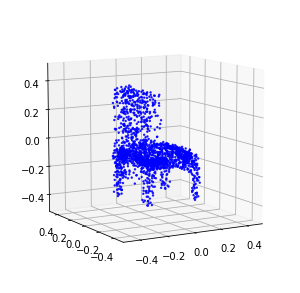

501 (-0.04137464509871991, -0.053941445587121925) 22.5942311287
502 (-0.04029942194566778, -0.061157998143006924) 23.0104320049
503 (-0.04109391702905945, -0.031226026420683964) 22.9399759769
504 (-0.04106383296944525, -0.014929842467055372) 23.0160927773
505 (-0.040041014406344166, -0.038430064876118435) 22.9349689484
506 (-0.039138187443756536, -0.017659493914359937) 22.9858059883
507 (-0.03897399092498033, -0.04454965859084674) 22.9908211231
508 (-0.041948442930436654, -0.03759764072120837) 22.8438839912
509 (-0.039359223615864046, -0.0347032194511722) 23.0025119781
510 (-0.039602687711948935, -0.07072718631800103) 22.8790888786
511 (-0.03938190102901148, -0.04915320573617583) 22.889193058
512 (-0.040300258095173735, -0.04380463321855211) 23.0062718391
513 (-0.039675323381696055, -0.06394450730927613) 22.8063979149
514 (-0.04159477904600942, -0.06382387586484622) 22.9586200714
515 (-0.03846635554471742, -0.048526557132034846) 22.9486169815
516 (-0.03992997702697049, -0.0639404506301

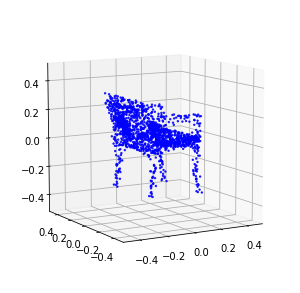

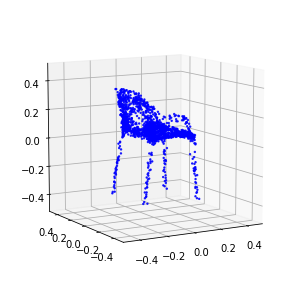

601 (-0.03914246102390082, -0.025735498332600717) 22.3881700039
602 (-0.038532043353694936, -0.03529535302811343) 22.6717979908
603 (-0.03822506074186253, -0.03811324244041158) 22.8691530228
604 (-0.03926474354027406, -0.052786444566900965) 22.9843959808
605 (-0.03747806749914003, -0.043422135453590235) 22.8212330341
606 (-0.03779966406038274, -0.029546916464586622) 22.9274179935
607 (-0.039156206826800884, -0.04699223593849203) 22.862639904
608 (-0.036102028061514316, -0.07039757627669883) 22.9460499287
609 (-0.037307610727198744, -0.025072008351107008) 22.8837389946
610 (-0.037894960428061696, -0.04053916695082317) 22.85790205
611 (-0.03855862323518681, -0.024584999307990074) 22.8694748878
612 (-0.03678068603672411, -0.03827174951362869) 22.8578770161
613 (-0.03810017716301524, -0.048442742463363254) 22.941193819
614 (-0.03744351049966138, -0.05054668260171362) 22.8509421349
615 (-0.03686861402314642, -0.059168161196715155) 22.8937220573
616 (-0.03758153658684181, -0.0404941335158503

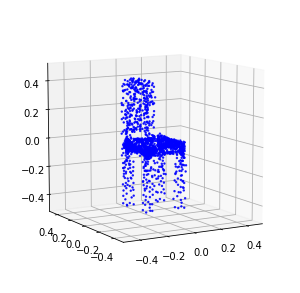

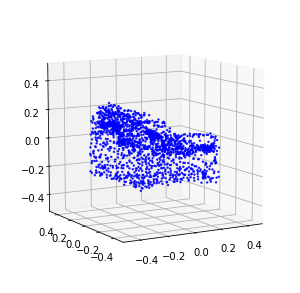

701 (-0.03472174142041932, -0.07246658384152081) 22.704720974
702 (-0.036705163931069165, -0.06718867314655495) 23.0291249752
703 (-0.03715561872915081, -0.052392792037647705) 23.0536599159
704 (-0.036880830610575885, -0.07766755617669095) 22.9099218845
705 (-0.03610117746436078, -0.05491225102551929) 22.9298360348
706 (-0.036025832399078035, -0.057941658665304596) 23.0353879929
707 (-0.035196479515213035, -0.07607141851811954) 23.1062130928
708 (-0.034596375392183014, -0.08822395871190922) 22.9579000473
709 (-0.03511108276636704, -0.08632937294896692) 22.9458489418
710 (-0.034946070700559925, -0.08137008122613897) 22.9522509575
711 (-0.036297647128610507, -0.07873737034590347) 22.9222340584
712 (-0.03641497401277656, -0.058932022272568683) 23.0078799725
713 (-0.033555466050039166, -0.0724912610957804) 22.9931709766
714 (-0.035580997760205166, -0.06684393989448638) 22.9090120792
715 (-0.03574987551926271, -0.07387138615645793) 22.876955986
716 (-0.03629070085513851, -0.0715278860222062

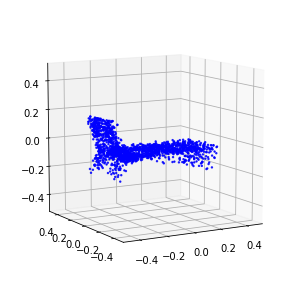

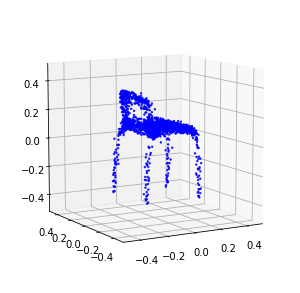

801 (-0.032553367422002814, -0.11756084438251413) 22.5839779377
802 (-0.032961506550402746, -0.11472539781876233) 22.9561800957
803 (-0.032590976430346134, -0.0998959646600744) 22.9271039963
804 (-0.03394635041122851, -0.11700847404806511) 22.8949160576
805 (-0.03276061912107727, -0.1088863363408524) 22.8691689968
806 (-0.03403543140739203, -0.09931008226197699) 23.0290818214
807 (-0.03399212452704492, -0.10039887512507646) 22.9560120106
808 (-0.033891160219259885, -0.10680583456490675) 22.9349899292
809 (-0.03130700934030439, -0.11866986666522596) 22.8573429585
810 (-0.0340311327625228, -0.09604277174271968) 22.8742520809
811 (-0.032549811478542245, -0.09713985148371886) 22.920842886
812 (-0.03495238540775102, -0.07425591637096975) 22.8495140076
813 (-0.034044294241491864, -0.10345856625202071) 22.9398269653
814 (-0.03616128704794075, -0.07393899859617585) 22.8333508968
815 (-0.03486685215131096, -0.08864850251247054) 22.8543579578
816 (-0.03228793222781109, -0.05654308236325565) 22.8

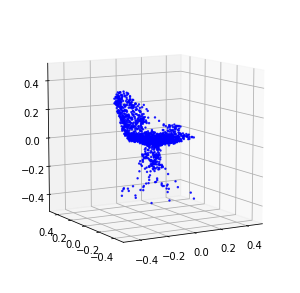

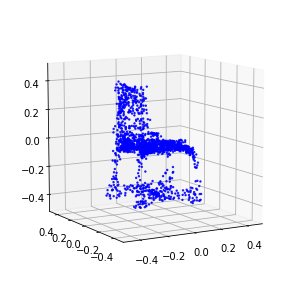

901 (-0.03281053111119115, -0.1028500197040241) 22.5146489143
902 (-0.03195556466994078, -0.10334864062378588) 22.826818943
903 (-0.030920930635993896, -0.10838011765609616) 22.8839101791
904 (-0.031825318122687546, -0.1052410937845707) 22.8700768948
905 (-0.0314670418591603, -0.09345274108826467) 22.7808048725
906 (-0.030993308240304822, -0.10590962498732236) 22.9094338417
907 (-0.03183410880358323, -0.09885556846047225) 22.8588211536
908 (-0.031050978641471137, -0.11090921517461538) 22.8555519581
909 (-0.032279784029916575, -0.09970176912358274) 22.85927701
910 (-0.032096756881345875, -0.10407974141771378) 22.9127321243
911 (-0.03236422578439764, -0.09753411775454879) 22.8358469009
912 (-0.031066463239814924, -0.11627300099834152) 22.8115479946
913 (-0.03308198388018038, -0.10139379484336013) 22.899684906
914 (-0.03042658194899559, -0.12342443527734798) 22.9529931545
915 (-0.027947718990237815, -0.11587048516325328) 22.7958850861
916 (-0.031192243965747563, -0.12365223439005406) 22.8

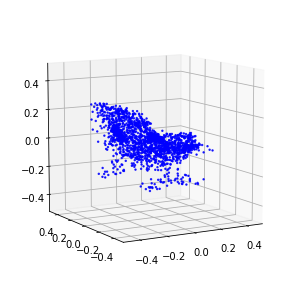

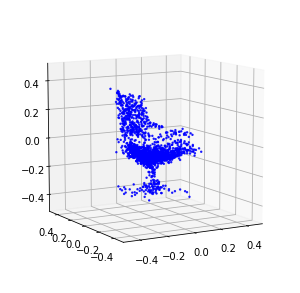

1001 (-0.029737187751933285, -0.14493666362503302) 22.5485420227
1002 (-0.028360141874493466, -0.12209498493567757) 22.8235440254
1003 (-0.030181256272708592, -0.10248867839412845) 22.8307580948
1004 (-0.031214391278183977, -0.12994346030704354) 22.8601338863
1005 (-0.030090677082214665, -0.12133842180280582) 22.9675688744
1006 (-0.02987933418025141, -0.14017382134561954) 22.8723819256
1007 (-0.029282544553279877, -0.12610252930418306) 22.8167619705
1008 (-0.02934934570575538, -0.12746264753134354) 22.8082950115
1009 (-0.03102830468636492, -0.15910145486502544) 22.8616080284
1010 (-0.029680719898770684, -0.14575746372018172) 22.9372050762
1011 (-0.028754554429779883, -0.15785949644835098) 22.8780760765
1012 (-0.028835570650256197, -0.15777528059223425) 22.8646390438
1013 (-0.03172423985341321, -0.1369600982769676) 22.8276431561
1014 (-0.02803166570222896, -0.12802279457125976) 22.8242690563
1015 (-0.030645644498746034, -0.10255033030863041) 22.8689911366
1016 (-0.029350873082876205, -0

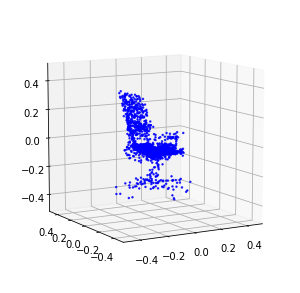

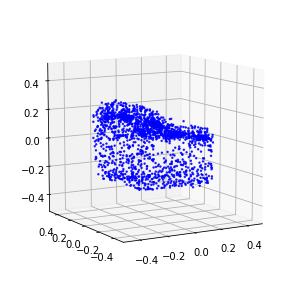

1101 (-0.029001453822559635, -0.12678055570501348) 22.6115159988
1102 (-0.03011062727917148, -0.11112190361904062) 22.9762220383
1103 (-0.02986894149495208, -0.1212226950927921) 22.9148368835
1104 (-0.02783819011857976, -0.09801079812662108) 22.9847099781
1105 (-0.028750171852500544, -0.1195665295843197) 22.9014499187
1106 (-0.02949867950671393, -0.11507470448217962) 22.9077279568
1107 (-0.02934319049362903, -0.12391216097318608) 22.9247391224
1108 (-0.028904433609188897, -0.15212990373939925) 22.9447071552
1109 (-0.029342143674907478, -0.10327545753376477) 22.8647589684
1110 (-0.028439692075809708, -0.12379847568176362) 23.0129458904
1111 (-0.030334556847810744, -0.1508255971028753) 22.9856481552
1112 (-0.028646067529916764, -0.11845390854970268) 22.9571909904
1113 (-0.02789846931219749, -0.12589831447795682) 22.8880860806
1114 (-0.027552867146289867, -0.13303995909898178) 22.8670530319
1115 (-0.027854871847059415, -0.14974895322128481) 23.0042219162
1116 (-0.02974910854321459, -0.143

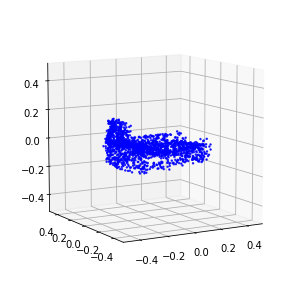

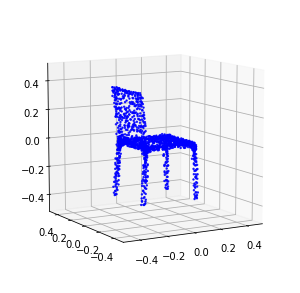

1201 (-0.02858910740798582, -0.17495930162460907) 22.5853321552
1202 (-0.026070344326612743, -0.16500654265932416) 22.8654000759
1203 (-0.02564031836455283, -0.1736359288511069) 22.9615910053
1204 (-0.026299228766204222, -0.16170500672381857) 22.9254200459
1205 (-0.028666031287740108, -0.17742757045704385) 22.9788689613
1206 (-0.024414535862920077, -0.17046377645886462) 22.9410569668
1207 (-0.025668341188651064, -0.20935989398023355) 22.8784799576
1208 (-0.02678055631239777, -0.17908887565135956) 22.9271481037
1209 (-0.027315581573740297, -0.17527197852082874) 23.0108978748
1210 (-0.029079316414730706, -0.15761552945427273) 22.9336719513
1211 (-0.027268121699276178, -0.15673232402490533) 22.9832670689
1212 (-0.027253514050465562, -0.1660926588203596) 22.8879361153
1213 (-0.028912714204710463, -0.16995433070089505) 22.9793729782
1214 (-0.02566989029393248, -0.15491680541764136) 22.9213879108
1215 (-0.027643063417433396, -0.1467703635925832) 22.9130139351
1216 (-0.026327019379190776, -0.

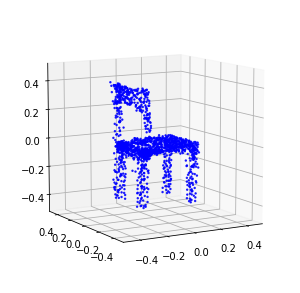

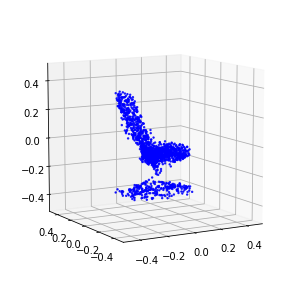

1301 (-0.02582062600666414, -0.1748534266067588) 22.5867500305
1302 (-0.026503199573768222, -0.15065010523666506) 22.9837701321
1303 (-0.02592720575225742, -0.18425709721834763) 22.9473128319
1304 (-0.02614335036310165, -0.1646439222537953) 22.8628368378
1305 (-0.024793562341643417, -0.1747614388232646) 23.0332899094
1306 (-0.02746991240621909, -0.161593910144723) 22.9191229343
1307 (-0.02637074418851863, -0.14172008601219757) 22.969479084
1308 (-0.025854123667206453, -0.1641804941970369) 22.8384978771
1309 (-0.027503445153327092, -0.16638357062702594) 22.9553470612
1310 (-0.028407987077598985, -0.18619447298671887) 22.8643271923
1311 (-0.026971322739415843, -0.17746095164962436) 23.1225781441
1312 (-0.02778647011550872, -0.15046590647619704) 22.8344569206
1313 (-0.02710331606719157, -0.17269641225752624) 23.0105400085
1314 (-0.02684890094982541, -0.17488163871609647) 23.0382540226
1315 (-0.025773432624080907, -0.16159691791171613) 22.9477579594
1316 (-0.025995326779134895, -0.16580460

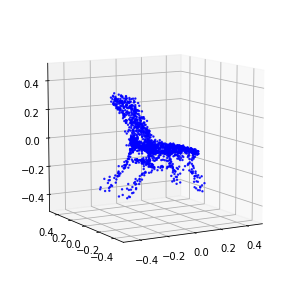

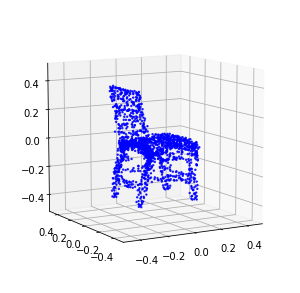

1401 (-0.02352272954809925, -0.17137779489807461) 28.1319360733
1402 (-0.02569265960027342, -0.17774606010188226) 23.879034996
1403 (-0.025297480631295752, -0.14799589307411856) 23.0156478882
1404 (-0.02520633082350959, -0.17281742815090262) 23.0398290157
1405 (-0.024053400819716245, -0.1754333163085191) 23.071144104
1406 (-0.025112305589668128, -0.17911990310834802) 23.330671072
1407 (-0.025654839400364005, -0.17794906380383865) 23.0023329258
1408 (-0.026181377701299347, -0.180391361532004) 23.0266480446
1409 (-0.02478434154358895, -0.1734226103062215) 23.1090888977
1410 (-0.025599692405565925, -0.17623733275610468) 23.2831919193
1411 (-0.025109985203522703, -0.16206177372647368) 23.1708540916
1412 (-0.024054141650381295, -0.16576260814200278) 23.1258060932
1413 (-0.025169422688043636, -0.2067094613676486) 23.0180990696
1414 (-0.025745538391334855, -0.1830429311679757) 23.4304790497
1415 (-0.025488608824494094, -0.17552217339044032) 25.4594769478
1416 (-0.025558761341254347, -0.146904

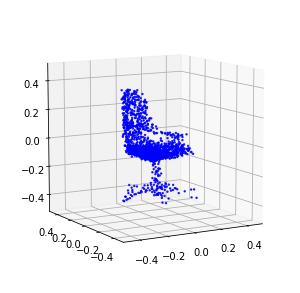

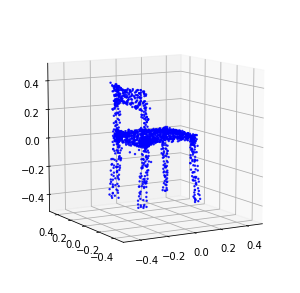

1501 (-0.02405846597545821, -0.17073159940216853) 23.695731163
1502 (-0.023942672785209573, -0.18855540130449377) 26.5280230045
1503 (-0.023932243077813282, -0.1993089904603751) 25.0035250187
1504 (-0.02339019449022801, -0.1832463546939518) 29.4456009865
1505 (-0.024040724393790184, -0.18831305853698566) 29.3263289928
1506 (-0.02346723934068628, -0.21056269044461456) 31.0752809048
1507 (-0.02341228563581472, -0.20239926194367203) 30.997467041
1508 (-0.024404536876017634, -0.1854838537781135) 25.3771691322
1509 (-0.025479284422877044, -0.18457199746499892) 23.8379480839
1510 (-0.022867902084861114, -0.17882152565795442) 23.8316061497
1511 (-0.024757577013224362, -0.15957087861455005) 24.0893218517
1512 (-0.023764092491372773, -0.17827164932437564) 24.8302948475
1513 (-0.02434521726454082, -0.18538281062374945) 23.3011960983
1514 (-0.023809216414456782, -0.16410256501125253) 24.000248909
1515 (-0.024468052164529977, -0.18579161361507748) 25.5304689407
1516 (-0.024700359797672086, -0.1699

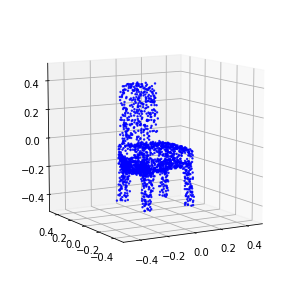

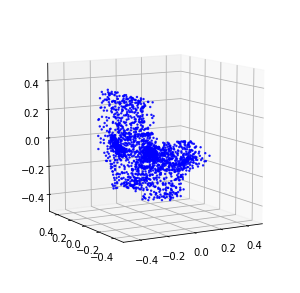

1601 (-0.022207304053818402, -0.15935964979555295) 28.2851850986
1602 (-0.024206189961051162, -0.1789245396528555) 29.259552002
1603 (-0.02150877102723588, -0.17109640460947287) 27.0085618496
1604 (-0.024003143199598013, -0.1633568759197774) 24.0021448135
1605 (-0.0225619460982473, -0.18417263938033063) 24.2285969257
1606 (-0.023313858420790538, -0.1738687361712041) 24.0172140598
1607 (-0.025734733656534683, -0.1682805699174819) 24.6336538792
1608 (-0.024360073556232712, -0.16153967477705167) 23.549505949
1609 (-0.02583778228448785, -0.17120659383742706) 23.4410669804
1610 (-0.023973392010868892, -0.16945483729891156) 23.1433980465
1611 (-0.023015868708329355, -0.1877365177092345) 23.3670070171
1612 (-0.023790173264949217, -0.1704967109405476) 23.6581449509
1613 (-0.022521982196232547, -0.18254268428553705) 23.3525409698
1614 (-0.022917324462500603, -0.16995861316504685) 23.3519108295
1615 (-0.026858459988042066, -0.17732440793643828) 24.0385320187
1616 (-0.025223460441212292, -0.16604

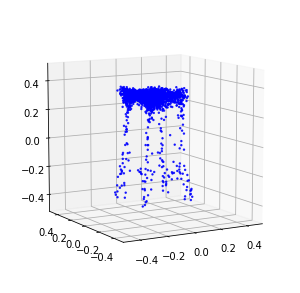

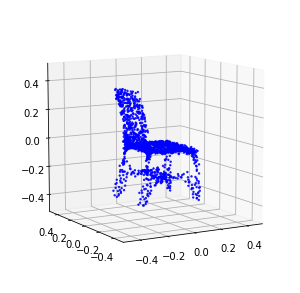

1701 (-0.0227931116707623, -0.1883445265500442) 23.006994009
1702 (-0.021764867084667735, -0.17647529846948126) 23.4037978649
1703 (-0.02244403518574393, -0.17115046278290127) 23.2733569145
1704 (-0.023160384631837193, -0.17550435629875763) 23.6537652016
1705 (-0.023053393674933392, -0.1667087904137114) 23.5307509899
1706 (-0.022673215923587915, -0.15669403451940286) 23.023307085
1707 (-0.0222399374227161, -0.1806234098646952) 23.437584877
1708 (-0.022664260649648698, -0.14449784596977028) 23.5168669224
1709 (-0.022964298518617515, -0.14794178388041) 23.6663000584
1710 (-0.02230645263891505, -0.15949940503291463) 27.3650958538
1711 (-0.02133749655407408, -0.20246575837549957) 28.7147099972
1712 (-0.021723520690980165, -0.1773364048289216) 28.5366439819
1713 (-0.02319145450854431, -0.1575372837807821) 28.8906359673
1714 (-0.023523103879035816, -0.17745777413896893) 28.6515600681
1715 (-0.02330381871079621, -0.16962765999462293) 27.1011841297
1716 (-0.022409173489912698, -0.1763046733711

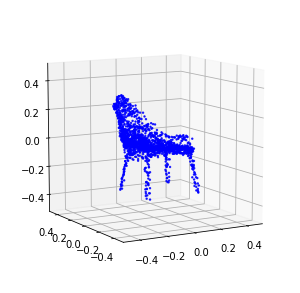

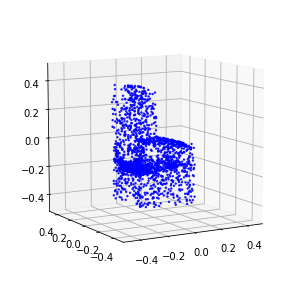

1801 (-0.02112924380065954, -0.18019750779089722) 31.0336620808
1802 (-0.021579734653072512, -0.18909447931725046) 28.7316951752
1803 (-0.02250514127638029, -0.17243781329497046) 29.3094320297
1804 (-0.02124066846445203, -0.19589457434156668) 29.2562451363
1805 (-0.020472308313069135, -0.18431846117195877) 29.008382082
1806 (-0.020684658501135267, -0.16293780376081882) 26.0166840553
1807 (-0.02248527485796291, -0.1555226176329281) 24.0245149136
1808 (-0.02255952322612638, -0.18199123506960663) 24.0712089539
1809 (-0.020755026270837886, -0.19579493610755258) 23.4973938465
1810 (-0.022668580459835736, -0.1825770042512728) 24.0882959366
1811 (-0.022532568977254887, -0.1899012249449025) 23.9932479858
1812 (-0.020640469301977882, -0.16004682866775471) 24.2056629658
1813 (-0.021102323848754167, -0.16445370763540268) 24.129021883
1814 (-0.020505989816687678, -0.16253852212558623) 26.0198221207
1815 (-0.021926902137372806, -0.1450685920274776) 24.945950985
1816 (-0.020722386811900396, -0.17409

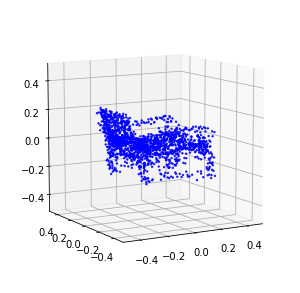

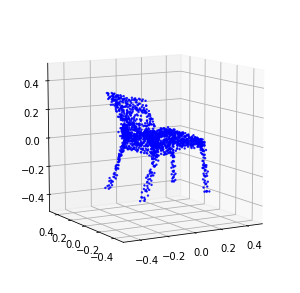

1901 (-0.022725528664886953, -0.1315025748765987) 23.7397351265
1902 (-0.021276184005419845, -0.13867739840592866) 24.7748520374
1903 (-0.02031791273747449, -0.1469106121879557) 25.532389164
1904 (-0.021078471074123747, -0.17227794246181197) 29.3926749229
1905 (-0.020516484963667134, -0.18153509853974634) 28.9999148846
1906 (-0.02186358583200237, -0.17002533376216888) 29.2526071072
1907 (-0.02104884577996057, -0.17779195341079132) 29.0589191914
1908 (-0.020883914974072704, -0.17106320287870325) 29.1981642246
1909 (-0.020311538745527682, -0.1822402383322301) 24.1937401295
1910 (-0.021366026450920363, -0.17987238988280296) 23.8876390457
1911 (-0.02104825615558935, -0.19122544967609903) 24.1396050453
1912 (-0.019864097124208575, -0.18808225671882214) 24.0213108063
1913 (-0.02180742012012912, -0.16832713977150296) 24.105453968
1914 (-0.02093255970141162, -0.15450318465414253) 23.8952319622
1915 (-0.021336215434838896, -0.1582269767380279) 24.0651199818
1916 (-0.02065764309271522, -0.182692

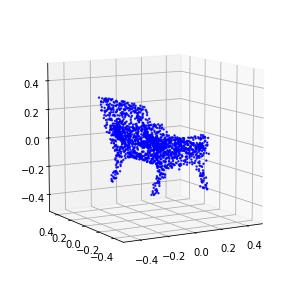

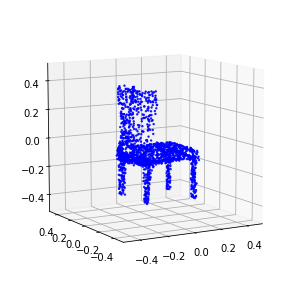

In [34]:
for _ in range(max_epochs):
    loss, duration = gan._single_epoch_train(train_data, batch_size, noise_params)
    epoch = int(gan.sess.run(gan.epoch.assign_add(tf.constant(1.0))))
    print epoch, loss, duration

    if epoch in save_synthetic_samples:
        syn_data = gan.generate(n_syn_samples, noise_params)
        np.savez(osp.join(save_syn_data_dir, 'epoch_' + str(epoch)), syn_data)            
        for k in range(2):
            Point_Cloud(syn_data[k]).plot()
    train_stats.append((epoch,) + loss)

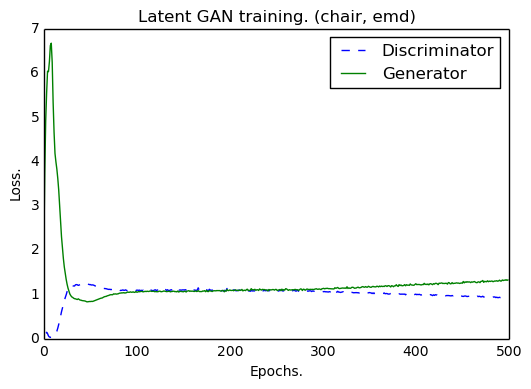

In [20]:
if plot_train_curve:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss, '--')
    plt.plot(x, g_loss)
    plt.legend(['Discriminator', 'Generator'], loc=0)    
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    plt.tick_params(axis='y', which='both', left='off', right='off')    
    plt.xlabel('Epochs.') 
    plt.ylabel('Loss.')